# Perceptron Implementation


In this jupyter notebook, I implement a simple 2D perceptron algorithm and use it to make predictions using data from a real patient dataset to predict diabetes: https://www.kaggle.com/code/mathchi/diagnostic-a-patient-has-diabetes/notebook. The data has 8 variables, and we can use this code to see which two variables help the perceptron make the best predictions, according to four metrics.

### Import the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Imports metrics for measuring how good our perceptron does
import itertools
import seaborn as sns

# Loads the dataset
df = pd.read_csv('diabetes.csv')

# Displays the first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Filtering the Data Set

In [2]:
# This function filters the dataset 
# It gets 20 rows with Outcome = 1 (diabetes) and 20 rows with Outcome = 0 (no diabetes)
# And it scales the values of the input rows, whatever those may be, in order to get good visualizations later in a square graph
def filtering(input1,input2,df):
    diabetes_data = df[df['Outcome'] == 1].head(20)  # First 20 rows with diabetes
    no_diabetes_data = df[df['Outcome'] == 0].head(20)  # First 20 rows without diabetes
    
    # Concatenate the two datasets into one
    small_df = pd.concat([diabetes_data, no_diabetes_data])
    
    # Features (e.g., Glucose and BMI) and Labels (Outcome)
    X_small = small_df[[input1, input2]].values
    y_small = small_df['Outcome'].values

    return X_small, y_small

## Perceptron Algorithm

In [3]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_dim + 1)  # +1 for the bias term

    def activation(self, x):
        """Step function as the activation function."""
        return 1 if x >= 0 else 0  # Output 1 or 0 based on threshold

    def fit(self, X, y):
        """Train the perceptron."""
        for epoch in range(self.epochs):
            for i in range(len(X)):
                # Calculate the weighted sum
                linear_output = np.dot(X[i], self.weights[1:]) + self.weights[0]
                prediction = self.activation(linear_output)
                
                # Calculate the error
                error = y[i] - prediction
                
                # Update weights and bias if there is an error
                self.weights[1:] += self.learning_rate * error * X[i]
                self.weights[0] += self.learning_rate * error

    def predict(self, X):
        """Make predictions based on the input data."""
        # Calculate the weighted sum for each input sample
        linear_output = np.dot(X, self.weights[1:]) + self.weights[0]
        # Apply the activation function to each sample's weighted sum
        return np.array([self.activation(x) for x in linear_output])


## Running the algorithm on the data set

In [4]:
# Get all column names except 'Outcome' (the thing we are trying to predict)
column_names = [col for col in df.columns if col != 'Outcome']

# Then get a list of all the distinct pairings among them
pairs = list(itertools.combinations(column_names, 2))

In [5]:
# Initialize an empty list to store the results
results = []

# Initialize variables to track the best pairs for each metric
best_accuracy_pair = None
best_precision_pair = None
best_recall_pair = None
best_f1_pair = None
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0

In [6]:
# Loop through each pair of features
for pair in pairs:
    input1, input2 = pair
    
    # Get the filtered and scaled data for the current pair of features
    X_small, y_small = filtering(input1, input2, df)
    
    # Initialize and train the perceptron on the current feature pair
    perceptron = Perceptron(input_dim=2, learning_rate=0.1)
    perceptron.fit(X_small, y_small)

    # Make predictions and evaluate the model
    predictions = perceptron.predict(X_small)
    
    # Calculate precision, recall, F1-score, and accuracy
    precision = precision_score(y_small, predictions, zero_division=1)
    recall = recall_score(y_small, predictions, zero_division=1)
    f1 = f1_score(y_small, predictions, zero_division=1)
    accuracy = accuracy_score(y_small, predictions)

    # Append the results for the current pair of features to the results list
    results.append({
        'Feature 1': input1,
        'Feature 2': input2,
        'Accuracy': f"{accuracy * 100:.2f}%",
        'Precision': f"{precision:.2f}",
        'Recall': f"{recall:.2f}",
        'F1-Score': f"{f1:.2f}"
    })
    
    # Track the best performing pair for each metric
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_accuracy_pair = (input1, input2)
    
    if precision > best_precision:
        best_precision = precision
        best_precision_pair = (input1, input2)
    
    if recall > best_recall:
        best_recall = recall
        best_recall_pair = (input1, input2)
    
    if f1 > best_f1:
        best_f1 = f1
        best_f1_pair = (input1, input2)

## Results

### Show the results for each pair for each of the four metrics

In [7]:
# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)

                   Feature 1                 Feature 2 Accuracy Precision  \
0                Pregnancies                   Glucose   50.00%      1.00   
1                Pregnancies             BloodPressure   47.50%      0.00   
2                Pregnancies             SkinThickness   50.00%      1.00   
3                Pregnancies                   Insulin   50.00%      1.00   
4                Pregnancies                       BMI   50.00%      1.00   
5                Pregnancies  DiabetesPedigreeFunction   52.50%      1.00   
6                Pregnancies                       Age   50.00%      1.00   
7                    Glucose             BloodPressure   50.00%      1.00   
8                    Glucose             SkinThickness   50.00%      1.00   
9                    Glucose                   Insulin   55.00%      1.00   
10                   Glucose                       BMI   52.50%      1.00   
11                   Glucose  DiabetesPedigreeFunction   50.00%      1.00   

### For the best performing pair for each of the four metrics, I plot the decision boundary and the confusion matrix

In [8]:
# Plotting function
def plot_decision_boundary(X, y, perceptron, best_pair, metric_name):
    # Plot the points (colored by class)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

    # Get the decision boundary: w1 * x1 + w2 * x2 + b = 0
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create grid for plotting the decision boundary
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    input1, input2 = best_pair
    plt.title(f"Best {metric_name} Pair: {input1} and {input2} - Decision Boundary")

    plt.xlabel(f"{input1}")
    plt.ylabel(f"{input2}")
    plt.legend()
    plt.show()

In [9]:
# Function to plot the decision boundary and confusion matrix
def plot_decision_boundary_and_confusion_matrix(X, y, perceptron, best_pair, metric_name):
    input1, input2 = best_pair
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plot_decision_boundary(X, y, perceptron, best_pair, metric_name)
    
    # Confusion Matrix
    cm = confusion_matrix(y, perceptron.predict(X))
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"Confusion Matrix for {input1} and {input2}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Plot the decision boundary and the confusion matrix for the best pair of each matrix

Best Pair for Accuracy: ('Glucose', 'Insulin')


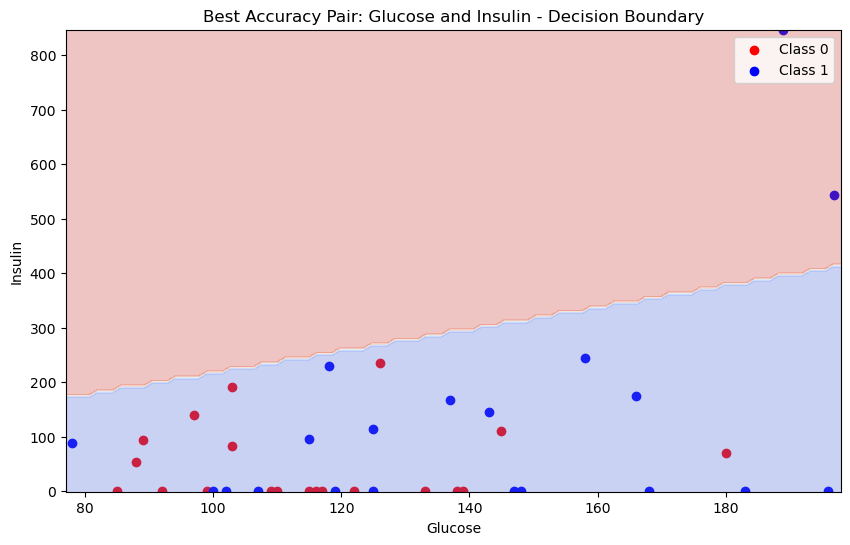

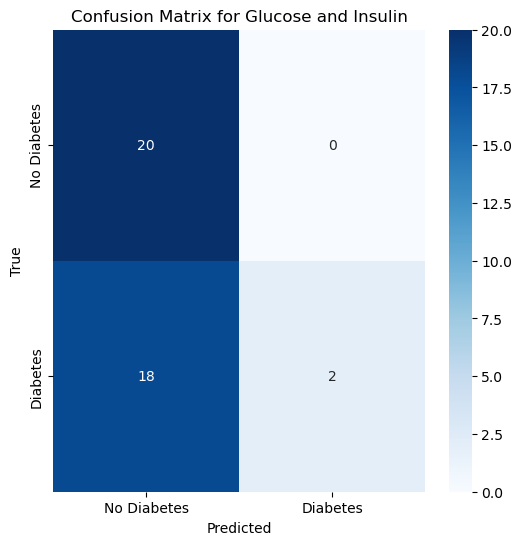

In [10]:
# Plot the decision boundary and confusion matrix for the best accuracy pair
print(f"Best Pair for Accuracy: {best_accuracy_pair}")
X_scaled, y_scaled = filtering(best_accuracy_pair[0], best_accuracy_pair[1], df)
perceptron = Perceptron(input_dim=2, learning_rate=0.1)
perceptron.fit(X_scaled, y_scaled)
plot_decision_boundary_and_confusion_matrix(X_scaled, y_scaled, perceptron, best_accuracy_pair, 'Accuracy')

Best Pair for Precision: ('Pregnancies', 'Glucose')


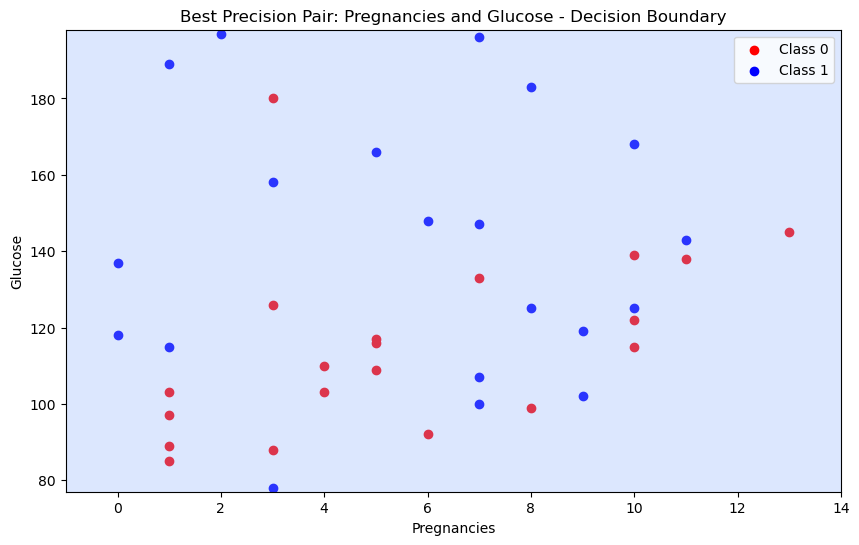

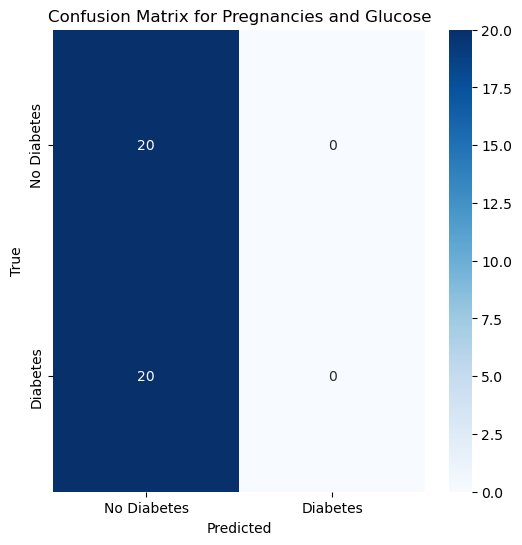

In [11]:
# Plot the decision boundary and confusion matrix for the best precision pair
print(f"Best Pair for Precision: {best_precision_pair}")
X_scaled, y_scaled = filtering(best_precision_pair[0], best_precision_pair[1], df)
perceptron = Perceptron(input_dim=2, learning_rate=0.1)
perceptron.fit(X_scaled, y_scaled)
plot_decision_boundary_and_confusion_matrix(X_scaled, y_scaled, perceptron, best_precision_pair, 'Precision')

Best Pair for Recall: ('Glucose', 'Insulin')


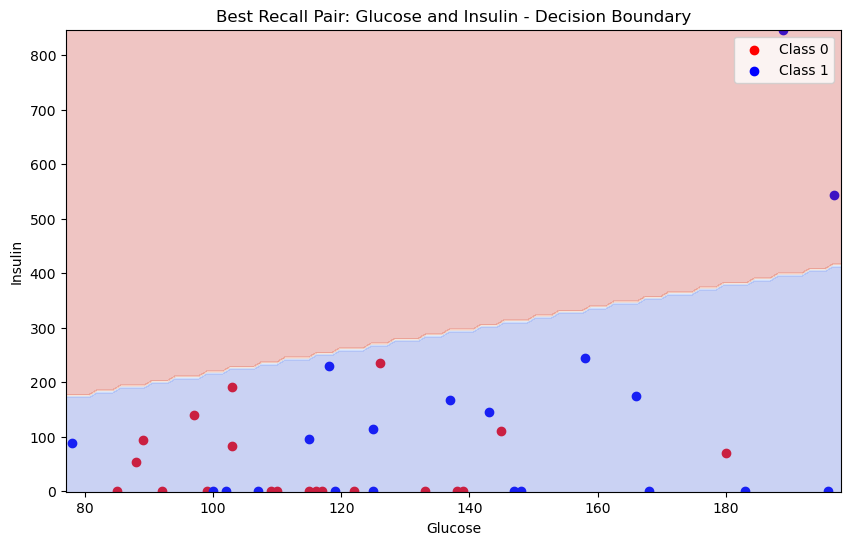

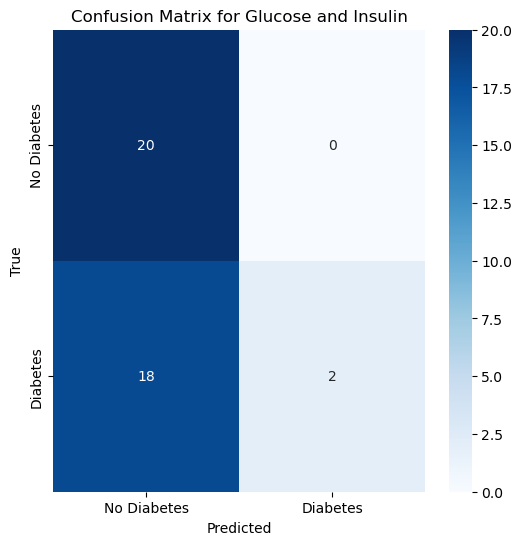

In [12]:
# Plot the decision boundary and confusion matrix for the best recall pair
print(f"Best Pair for Recall: {best_recall_pair}")
X_scaled, y_scaled = filtering(best_recall_pair[0], best_recall_pair[1], df)
perceptron = Perceptron(input_dim=2, learning_rate=0.1)
perceptron.fit(X_scaled, y_scaled)
plot_decision_boundary_and_confusion_matrix(X_scaled, y_scaled, perceptron, best_recall_pair, 'Recall')

Best Pair for F1-Score: ('Pregnancies', 'BloodPressure')


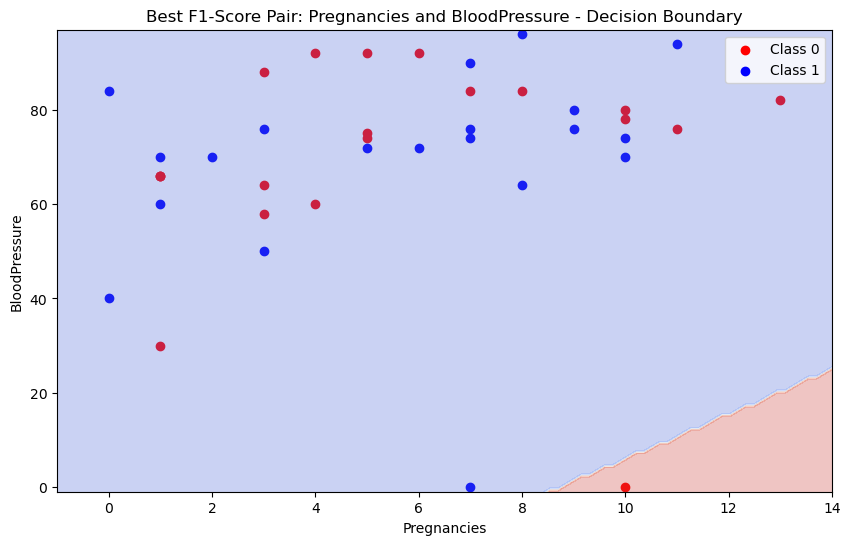

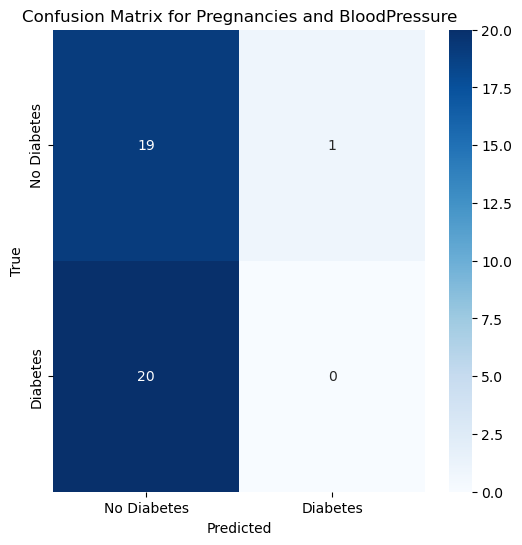

In [13]:
# Plot the decision boundary and confusion matrix for the best F1 pair
print(f"Best Pair for F1-Score: {best_f1_pair}")
X_scaled, y_scaled = filtering(best_f1_pair[0], best_f1_pair[1], df)
perceptron = Perceptron(input_dim=2, learning_rate=0.1)
perceptron.fit(X_scaled, y_scaled)
plot_decision_boundary_and_confusion_matrix(X_scaled, y_scaled, perceptron, best_f1_pair, 'F1-Score')

## Analysis & Discussion

These results show that a perceptron is not very well suited for categorizing a patient as having diabetes or not having diabetes based on only 2 other factors at a time. This is made clearer in the results_df table, where none of the results, for any of the pairs ran with any of the four metrics, are particularly good (except for precision). 

For instance, accuracy hovered around 50% for all pairings, meaning about half of all predictions were wrong. As we move on to precision, we see that almost all pairings achieved the best possible precision, which together with the relatively bad accuracy scores, indicates that there were almost none, or none, false positives. Looking at the four confusion matrices shows a similar trend. Briefly scrolling through them shows that the left half of the matrices are much darker, indicating that most of the predictions were for no diabetes. This is why the recall (which takes into account false negatives) and F1 (which takes into account the recall) are so bad.

These results imply that all pairs of columns, when taken alone, do not meaningfully correlate with the outcome (having or not having diabetes). Thus, the perceptron is unable to find a line that effectively categorizes even just one point correctly. Thus, most lines that it comes up with are placed away from the dots, sorting them all into one category (in this case, the category was no diabetes). The second plot, of Pregnancies and Glucose, is a good example of this. The line is not visible on the plot. Other pairings are better able to sort at least a few patients correctly, perhaps because at the extremes, they do meaningfully correlate to having or not having diabetes. One example of this is the third plot, of Glucose and Insulin. Two patients with outlier levels of insulin, away from all other points on the graph, have diabetes. This allowed the perceptron to decrease the error in its category by drawing a line that cut those two point away from the rest. 

Though the linear boundaries of a perceptron are a limitation, it is unlikely that in the 2D case, a more complex algorithm could sort the points correctly, considering the plots look very scrambled. At the higher dimensions, however, it is possible that even a linear classification (a hyperplane in n-D space) could do a good job of classifying correctly.